In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df=pd.read_csv("/content/drive/MyDrive/Machine Learning Lab Assignment/titanic_Train_DT.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.shape


(891, 12)

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


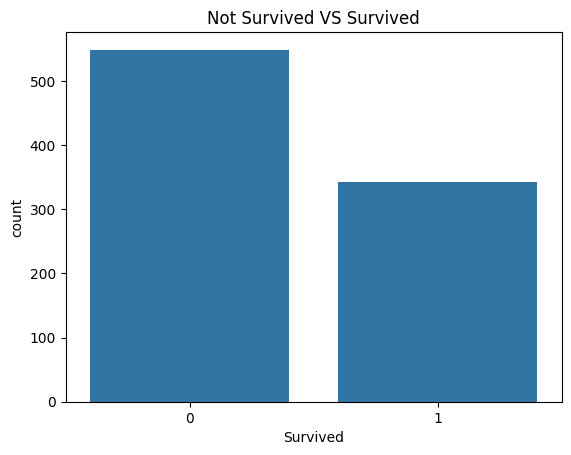

In [50]:
sns.countplot(x='Survived',data=train_df)
plt.title("Not Survived VS Survived")
plt.show()

In [10]:
train_df=train_df.drop(["Name"],axis=1)


In [11]:
train_df=train_df.drop(["Age"],axis=1)


In [12]:
train_df=train_df.drop(["Ticket"],axis=1)


In [13]:
train_df=train_df.drop(["Cabin"],axis=1)


In [18]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

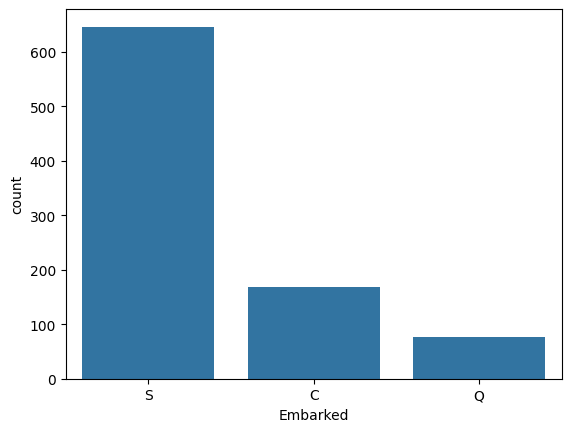

In [51]:
sns.countplot(x="Embarked",data=train_df)

train_df=train_df.fillna({'Embarked':'S'})

In [21]:
train_df['Sex']=np.where(train_df["Sex"]=="female",1,0)


In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,S
1,2,1,1,1,1,0,71.2833,C
2,3,1,3,1,0,0,7.9250,S
3,4,1,1,1,1,0,53.1000,S
4,5,0,3,0,0,0,8.0500,S


In [23]:
embarked_n=pd.get_dummies(train_df['Embarked'],prefix='embarked')
sex_n=pd.get_dummies(train_df['Sex'],prefix='sex')
pclass_n=pd.get_dummies(train_df['Pclass'],prefix='pclass')

In [24]:
df_new=pd.concat([train_df,
                     embarked_n,
                     sex_n,
                     pclass_n],axis=1)
df_new.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,3,0,1,0,7.2500,S,False,False,True,True,False,False,False,True
1,2,1,1,1,1,0,71.2833,C,True,False,False,False,True,True,False,False
2,3,1,3,1,0,0,7.9250,S,False,False,True,False,True,False,False,True
3,4,1,1,1,1,0,53.1000,S,False,False,True,False,True,True,False,False
4,5,0,3,0,0,0,8.0500,S,False,False,True,True,False,False,False,True


In [25]:
df_new=df_new.drop(["Pclass","Sex","Embarked"],axis=1)
df_new.head()

,PassengerId,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,1,0,7.2500,False,False,True,True,False,False,False,True
1,2,1,1,0,71.2833,True,False,False,False,True,True,False,False
2,3,1,0,0,7.9250,False,False,True,False,True,False,False,True
3,4,1,1,0,53.1000,False,False,True,False,True,True,False,False
4,5,0,0,0,8.0500,False,False,True,True,False,False,False,True


In [26]:
from sklearn.model_selection import train_test_split

In [55]:
Y=df_new["Survived"]
X=df_new.drop(["Survived","PassengerId"],axis=1)

X_train,X_test,Y_train,Y_test= train_test_split(X,y, test_size=0.2,random_state=21,stratify=y)

In [56]:
X.shape

(891, 11)

In [57]:
Y.shape

(891,)

In [58]:
from sklearn.metrics import accuracy_score

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
acc_dt=round(accuracy_score(Y_pred,Y_test)*100,2)
acc_dt

84.92

In [74]:
Y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [75]:
X_test_prediction = dt.predict(X_test)

In [76]:
print(X_test_prediction)

[0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0
 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0]


In [77]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8491620111731844
